In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('data/CarPrice_Assignment.csv')

/tmp/ipykernel_45814/2924583193.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

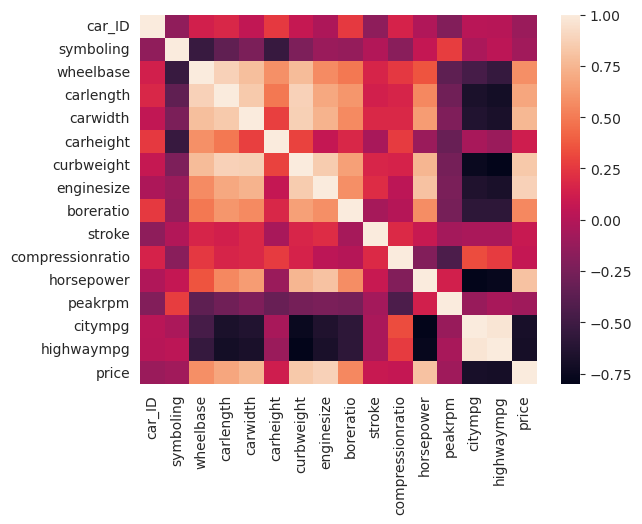

In [14]:
corr = data.corr()
sns.heatmap(corr)

In [15]:
data.dtypes


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

First I'm going to make a model that predict the horsepower by engine size.

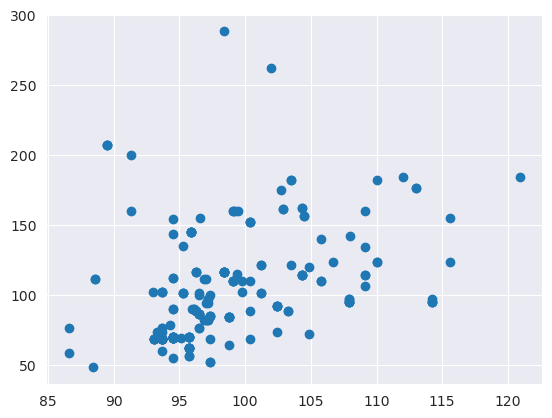

In [16]:
plt.scatter(data['wheelbase'],data['horsepower'])

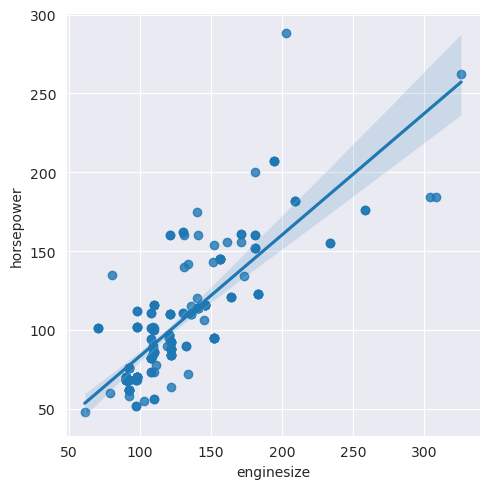

In [17]:
sns.lmplot(data, x='enginesize', y='horsepower')

In [18]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = np.array(data['enginesize']).reshape(-1, 1)
y = np.array(data['horsepower'])

X_train,X_test,y_train,y_test = train_test_split(X,y ,
                                   random_state=754, 
                                   test_size=0.3, 
                                   shuffle=True)
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:

y_pred = model.predict(X_test)

for i in range(len(y_pred)):
    print("Predicted:", y_pred[i], "\tActual:", y_test[i])

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Predicted: 120.75217420268336 	Actual: 154
Predicted: 151.24899438905834 	Actual: 207
Predicted: 81.54197682020127 	Actual: 102
Predicted: 98.24261644607327 	Actual: 160
Predicted: 67.7457962596983 	Actual: 60
Predicted: 106.22987887583814 	Actual: 90
Predicted: 61.21076336261795 	Actual: 101
Predicted: 90.2553540163084 	Actual: 86
Predicted: 120.0260594363411 	Actual: 143
Predicted: 75.73305868946318 	Actual: 68
Predicted: 90.98146878265067 	Actual: 78
Predicted: 88.80312448362388 	Actual: 111
Predicted: 85.17255065191257 	Actual: 55
Predicted: 112.7649117729185 	Actual: 114
Predicted: 98.96873121241553 	Actual: 88
Predicted: 89.52923924996614 	Actual: 90
Predicted: 104.77764934315363 	Actual: 111
Predicted: 97.51650167973101 	Actual: 97
Predicted: 89.52923924996614 	Actual: 88
Predicted: 109.13433794120719 	Actual: 110
Predicted: 97.51650167973101 	Actual: 97
Predicted: 107.68210840852267 	Actual: 72
Predicted: 81.54197682020127 	Actual: 70
Predicted: 151.24899438905834 	Actual: 207


In [20]:
#Tuning the model for the best accuricy

r2_list = []

for i in range(10000):
    X = np.array(data['enginesize']).reshape(-1, 1)
    y = np.array(data['horsepower'])

    X_train,X_test,y_train,y_test = train_test_split(X,y ,
                                       random_state=i, 
                                       test_size=0.3, 
                                       shuffle=True)
    model = linear_model.LinearRegression()
    model.fit(X_train,y_train)
    r2 = r2_score(y_test, y_pred)
    r2_list.append(r2)

best_index = np.argmax(r2_list)
print(best_index)

754


Let's Try another parametars:

In [21]:
#sns.lmplot(data, x='', y='')

In [22]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = np.array(data['wheelbase']).reshape(-1, 1)
y = np.array(data['carlength'])

X_train,X_test,y_train,y_test = train_test_split(X,y ,
                                   random_state=754, 
                                   test_size=0.3, 
                                   shuffle=True)
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

for i in range(len(y_pred)):
    print("Predicted:", y_pred[i], "\tActual:", y_test[i])

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Predicted: 166.19758828120547 	Actual: 171.2
Predicted: 157.00975753044355 	Actual: 168.9
Predicted: 164.72753536108357 	Actual: 157.3
Predicted: 174.65039257190645 	Actual: 186.6
Predicted: 164.72753536108357 	Actual: 150.0
Predicted: 169.1376941214493 	Actual: 176.8
Predicted: 167.66764120132737 	Actual: 169.0
Predicted: 169.87272058151026 	Actual: 175.4
Predicted: 166.19758828120547 	Actual: 168.9
Predicted: 164.72753536108357 	Actual: 157.3
Predicted: 165.830075051175 	Actual: 170.7
Predicted: 170.60774704157123 	Actual: 173.6
Predicted: 166.19758828120547 	Actual: 165.3
Predicted: 184.20573655269885 	Actual: 188.8
Predicted: 169.50520735147978 	Actual: 172.4
Predicted: 166.19758828120547 	Actual: 159.3
Predicted: 155.3559479953064 	Actual: 168.8
Predicted: 190.82097469324748 	Actual: 186.7
Predicted: 177.03922856710457 	Actual: 183.1
Predicted: 177.03922856710457 	Actual: 180.2
Predicted: 171.15901688661694 	Actual: 173.4
Predicted: 185.3082762427903 	Actual: 175.0
Predicted: 168.

<Axes: xlabel='curbweight', ylabel='highwaympg'>

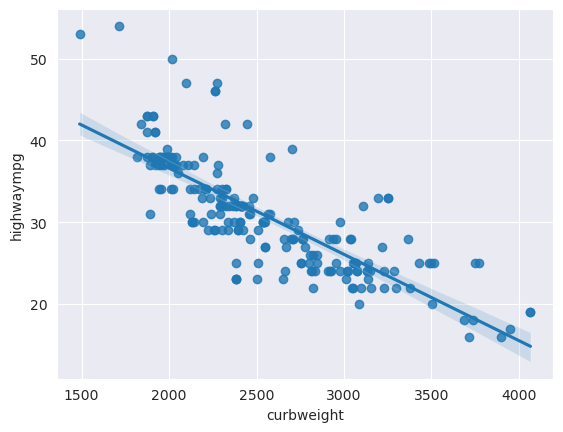

In [24]:
sns.regplot(data, x = 'curbweight', y = 'highwaympg')